In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

In [2]:
# Existing data (from computing_gradient_descent.ipynb)
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

def zscore_normalize_features(X):
    """
    X (ndarray (m,n)): Data, m examples, n features
    """
    # Find the mean of each column (feature)
    mu = np.mean(X, axis=0)
    # Find the standard deviation of each column
    sigma = np.std(X, axis=0)
    
    # Normalization formula: (x - mu) / sigma
    X_norm = (X - mu) / sigma      

    return X_norm, mu, sigma

# Apply scaling operation
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)

print(f"Original X_train:\n{X_train}")
print(f"\nScaled X_norm:\n{X_norm}")
print("\nNow all features have similar scales around -1 to 1!")

Original X_train:
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]

Scaled X_norm:
[[ 1.26  1.34 -0.71  1.22]
 [-0.08 -0.27  1.41  0.  ]
 [-1.18 -1.07 -0.71 -1.22]]

Now all features have similar scales around -1 to 1!


In [3]:
print(f"X_train.shape: {X_train.shape} , data type: {type(X_train)}")
print(f"y_train.shape: {y_train.shape} , data type: {type(y_train)}")

X_train.shape: (3, 4) , data type: <class 'numpy.ndarray'>
y_train.shape: (3,) , data type: <class 'numpy.ndarray'>


In [4]:
b_init = 785.1811367994083     # value, scalar
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])    # one dimensional
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


In [5]:
def predict_single_loop(x, w, b):

    m = x.shape[0]
    f_wb_i = 0

    for i in range(m):
        f_wb_i += w[i] * x[i]
    f_wb_i = f_wb_i + b

    return f_wb_i

In [6]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

x_vec shape (4,), x_vec value: [2104    5    1   45]


In [7]:
# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)    # for the first line (entire line 0, with the chosen weight, the chosen intercept)

print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

f_wb shape (), prediction: 459.9999976194083


In [8]:
def predict_dot(x, w, b):
    return np.dot(x, w) + b # Vectorized form in the book (Equation 4-2)

In [10]:
# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)    # for the first line (entire line 0, with the chosen weight, the chosen intercept)

print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

f_wb shape (), prediction: 459.9999976194083


The equation for the cost function with multiple variables is:

$$
J(\mathbf{w}, b) = \frac{1}{2m} \sum_{i=0}^{m-1}
\left( f_{\mathbf{w}, b}(\mathbf{x}^{(i)}) - y^{(i)} \right)^2
$$

where:

$$
f_{\mathbf{w}, b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b
$$


In [11]:
def compute_cost(x, y, w, b):

    m = x.shape[0]

    total_cost = 0.0

    for i in range(m):
        f_wb_cost = np.dot(w, x[i]) + b

        total_cost += (f_wb_cost - y[i]) ** 2

    total_cost = total_cost / (2 * m)

    return total_cost

In [12]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1.5578904428966628e-12


<a name="toc_15456_5"></a>
# 5 Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


In [13]:
def compute_gradient(x, y, w, b):

    m,n = x.shape     # m = number of training examples, n = number of features
    

    dj_dw = np.zeros(n,)
    dj_db = 0
    

    for i in range(m):  # for each training example
        err = ((np.dot(w,x[i]) + b) - y[i])     # e^(i) = y_pred^(i) - y_act^(i)

        for j in range(n):    # over all features
            dj_dw[j] = dj_dw[j] + err * x[i,j]   

        dj_db = dj_db +  err

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db    # Mean derivatives (gradients)
        

In [14]:
#Compute and display gradient 
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: 
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


# Regression Metrics Formulas

## 1️ Error (Residual)

>Difference between prediction and actual value for each example:  
$$
e^{(i)} = \hat{y}^{(i)} - y^{(i)}
$$

---

## 2️ Loss (Loss per example)

>###  a) MSE Loss
$$
L^{(i)}_{\text{MSE}} = \big( e^{(i)} \big)^2 = (\hat{y}^{(i)} - y^{(i)})^2
$$

>### b) MAE Loss
$$
L^{(i)}_{\text{MAE}} = \big| e^{(i)} \big| = |\hat{y}^{(i)} - y^{(i)}|
$$

---

## 3️ Cost (Average loss for the entire dataset)

>### a) MSE Cost
Mean Squared Error (usually normalized by 1/2m):  
$$
J_{\text{MSE}}(w,b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2
$$

>### b) MAE Cost
Mean Absolute Error:  
$$
J_{\text{MAE}}(w,b) = \frac{1}{m} \sum_{i=1}^{m} |\hat{y}^{(i)} - y^{(i)}|
$$


In [15]:
def gradient_descent(X, y, w_in, b_in, cost_function,  gradient_function, alpha, num_iters):

    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion (limit)  ---- do not keep in memory
            J_history.append( cost_function(X, y, w, b))

            # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history #return final w,b and J history for graphing

In [20]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1174
alpha = 0.01
# run gradient descent 

w_final, b_final, J_hst = gradient_descent(X_norm, y_train, initial_w, initial_b,
                                          compute_cost, compute_gradient, alpha, iterations)

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(w_final ,X_train[i]) + b_final:0.2f}, target value: {y_train[i]}")
    

Iteration    0: Cost 48254.77   
Iteration  118: Cost  3882.02   
Iteration  236: Cost   361.67   
Iteration  354: Cost    33.74   
Iteration  472: Cost     3.15   
Iteration  590: Cost     0.29   
Iteration  708: Cost     0.03   
Iteration  826: Cost     0.00   
Iteration  944: Cost     0.00   
Iteration 1062: Cost     0.00   
b,w found by gradient descent: 290.00,[ 38.05  41.54 -30.99  36.34] 
prediction: 82162.73, target value: 460
prediction: 55687.43, target value: 232
prediction: 34034.04, target value: 178


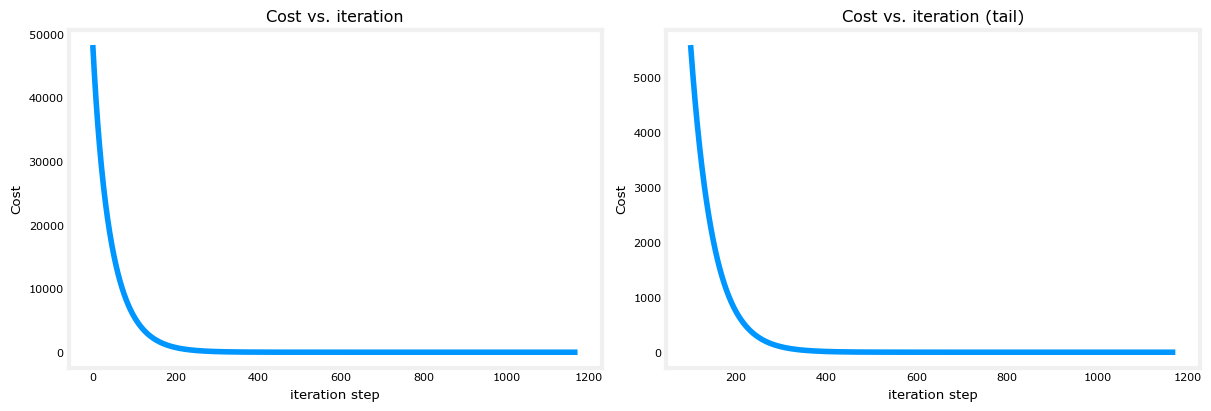

In [21]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hst)
ax2.plot(100 + np.arange(len(J_hst[100:])), J_hst[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()